# State-of-the-art model using VGG16

---

### Importing the libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, utils
from tensorflow import keras
from matplotlib import pyplot as plt

import sys
sys.path.insert(0, '../helpers/')
from plot_graphs import plot_loss, plot_acc

### Setting batch and image size, and importing the datasets

In [3]:
IMAGE_SIZE = 100
BATCH_SIZE = 32

train = utils.image_dataset_from_directory("../datasets/data/split/Zenodo/train", image_size=(IMAGE_SIZE, IMAGE_SIZE), batch_size=BATCH_SIZE)
val = utils.image_dataset_from_directory("../datasets/data/split/Zenodo/val", image_size=(IMAGE_SIZE, IMAGE_SIZE), batch_size=BATCH_SIZE)
test = utils.image_dataset_from_directory("../datasets/data/split/Zenodo/test", image_size=(IMAGE_SIZE, IMAGE_SIZE), batch_size=BATCH_SIZE)

train = train.prefetch(buffer_size=tf.data.AUTOTUNE).cache()
val = val.prefetch(buffer_size=tf.data.AUTOTUNE).cache()
test = test.prefetch(buffer_size=tf.data.AUTOTUNE).cache()

Found 3840 files belonging to 6 classes.
Found 480 files belonging to 6 classes.
Found 480 files belonging to 6 classes.


### Processing the data for VGG16

In [4]:
train = train.map(lambda x, y: (tf.keras.applications.vgg16.preprocess_input(x), y))
val = val.map(lambda x, y: (tf.keras.applications.vgg16.preprocess_input(x), y))
test = test.map(lambda x, y: (tf.keras.applications.vgg16.preprocess_input(x), y))

### Defining the SOTA VGG16 model with no weights and a low learning rate

In [5]:
model = tf.keras.applications.VGG16(
    include_top=True,
    weights=None,
    input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3),
    pooling='avg',
    classes=6,
    classifier_activation="softmax"
)

model.compile(optimizer=keras.optimizers.RMSprop(0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 100, 100, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 100, 100, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 50, 50, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 50, 50, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 50, 50, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 25, 25, 128)       0     

### Running the SOTA VGG16 model with patience 7

In [9]:
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath="../models/6_sota_vgg16.h5",
        monitor="val_accuracy",
        save_best_only=True
    )
]

history = model.fit(
  train,
  epochs=20,
  callbacks=callbacks_list,
  validation_data=val
)

Epoch 1/20
120/120 [==============================] - 67s 555ms/step - loss: 0.0605 - accuracy: 0.9846 - val_loss: 0.4307 - val_accuracy: 0.9042
Epoch 2/20
120/120 [==============================] - 68s 570ms/step - loss: 0.0578 - accuracy: 0.9849 - val_loss: 0.1961 - val_accuracy: 0.9417
Epoch 3/20
120/120 [==============================] - 70s 584ms/step - loss: 0.0409 - accuracy: 0.9893 - val_loss: 0.2684 - val_accuracy: 0.9438
Epoch 4/20
120/120 [==============================] - 79s 657ms/step - loss: 0.0515 - accuracy: 0.9857 - val_loss: 0.3370 - val_accuracy: 0.9313
Epoch 5/20
120/120 [==============================] - 71s 589ms/step - loss: 0.0458 - accuracy: 0.9888 - val_loss: 0.3081 - val_accuracy: 0.9417
Epoch 6/20
120/120 [==============================] - 71s 589ms/step - loss: 0.0432 - accuracy: 0.9914 - val_loss: 0.3098 - val_accuracy: 0.9375
Epoch 7/20
120/120 [==============================] - 71s 591ms/step - loss: 0.0383 - accuracy: 0.9880 - val_loss: 0.2798 - val_ac

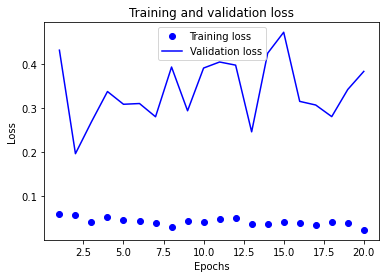

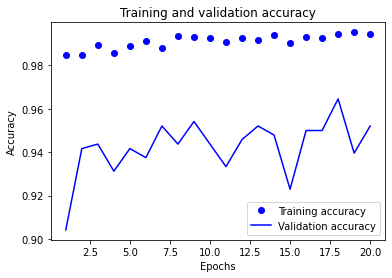

In [10]:
plot_loss(history)
plot_acc(history)

### Evaluating test accuracy on the SOTA model

In [11]:
load_model = tf.keras.models.load_model("../models/6_sota_vgg16.h5")
load_model.evaluate(test)

2022-08-31 06:19:41.749429: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


15/15 [==============================] - 2s 124ms/step - loss: 0.3720 - accuracy: 0.9479


[0.371992826461792, 0.9479166865348816]

---

*Test Accuracy*: **94.79%**

---